# Classical System: Logistic Regression

The code below details the implementation of a standard logistic regression algorithm used in Neural Networks. The main use case for this type of algorithm is to sort binary data using features of the data points to then map onto a one dimensional output.

In [3]:
#Standard imports for data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The Social Network Ads data set is a standard data set that is accessible online that maps age and estimated salary.

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Training Data
By taking a smaller portion of the overall data set(25%) and setting that aside for testing, we can test the overall efficiency of the algorithm on the whole data set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)#testing 25% of the overall data as a smaller test data set
print(X_train[:4])
print(y_train[:4])
print(X_test[:4])
print(y_test[:4])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]]
[0 1 0 1]
[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]]
[0 0 0 0]


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)#Here the classifer is using the test data for training

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

## Mapping Data

Here we map the training data from the logistic regression algortim to show a binary crossection between the two different data point sets. On a majority scale, the blue points should reside in the blue region and the green points within the green region.

/tmp/ipykernel_103/2043197277.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)


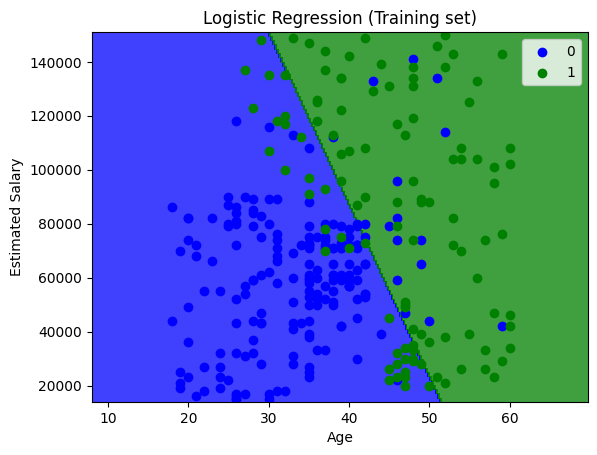

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# plt.show()
plt.savefig('classical_svm_feature_space.png', dpi=600)

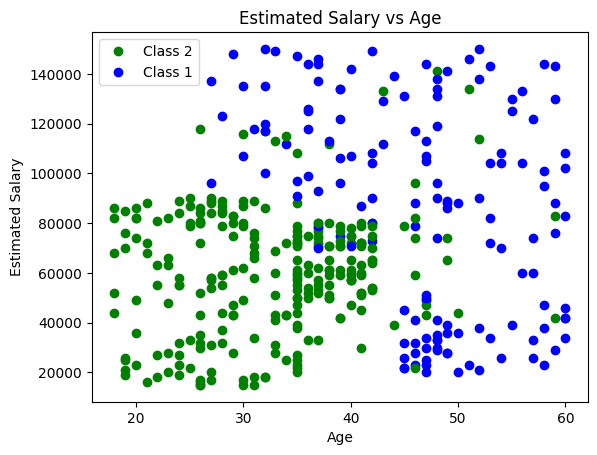

In [11]:
#This code plots the original data set onto a graph for visual representaion and comparison
for i, data in enumerate(zip(X, y)):
  x_cur, y_target = data
  if i == 0 or i == 7:
    if y_target == 1:
      plt.plot(x_cur[0], x_cur[1], "bo", label='Class 1')
    else:
      plt.plot(x_cur[0], x_cur[1], "go", label='Class 2')
  else:
   if y_target == 1:
        plt.plot(x_cur[0], x_cur[1], "bo")
   else:
        plt.plot(x_cur[0], x_cur[1], "go")

plt.title("Estimated Salary vs Age")
plt.ylabel("Estimated Salary")
plt.xlabel("Age")
plt.legend()
# plt.show()
plt.savefig('qnn_dataset_vis.png', dpi=600)

# Results:

The overall results show that the classical system of sorting binary data has an accuracy of 89% where the top-left and bottom-right quadrants added together provide the accurate results and top-right and bottom-left provide the inaccruate results. In others words, 89% of the data was marked correctly by its class where 11% was not.

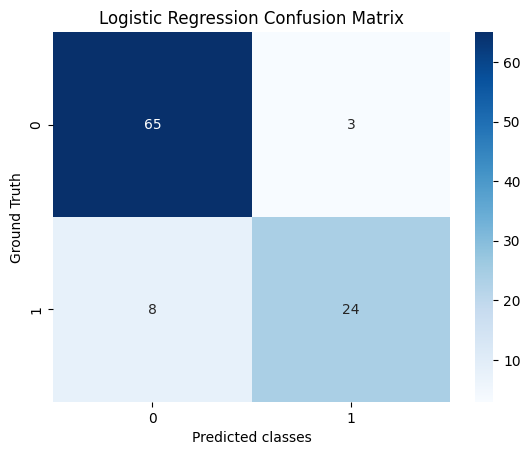

In [11]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and ticks
plt.xlabel('Predicted classes')
plt.ylabel('Ground Truth')
plt.title('Logistic Regression Confusion Matrix')
# plt.show()
plt.savefig('log_reg_cm.png', dpi=600)